In [1]:
import sys
print(sys.executable)

E:\anaconda3\envs\tensorflow21gpu\python.exe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf
# import tensorflow_addons as tfa

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용 가능 여부: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
train_pandas = pd.read_csv("train_job/train.csv")
train_usertags_pandas = pd.read_csv("train_job/user_tags.csv")
train_jobtags_pandas = pd.read_csv("train_job/job_tags.csv")
train_jobcompanies_pandas = pd.read_csv("train_job/job_companies.csv")
tags_pandas = pd.read_csv("train_job/tags.csv")
test_pandas = pd.read_csv("test_job.csv")

In [4]:
train_pandas

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0
...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0


In [5]:
test_pandas

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4
...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


In [6]:
train_and_test = pd.concat([train_pandas.drop(['applied'],axis=1),test_pandas],ignore_index=True)
train_and_test

,userID,jobID
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3
...,...,...
8430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
8431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
8432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
8433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


In [7]:
for t in list(set(tags_pandas['tagID'].values)):
    train_and_test[t] = 0

In [8]:
from collections import defaultdict
usertagdict = defaultdict(list)
for u, t in train_usertags_pandas.values:
    usertagdict[u].append(t)
jobtagdict = defaultdict(list)
for j, t in train_jobtags_pandas.values:
    jobtagdict[j].append(t)

In [9]:
for i,(u,j) in enumerate(train_and_test[['userID','jobID']].values):
    for t in usertagdict[u]:
        train_and_test.loc[i,t] |= 1
    for t in jobtagdict[j]:
        train_and_test.loc[i,t] |= 1 << 1

In [10]:
train_and_test

,userID,jobID,3a835d3215755c435ef4fe9965a3f2a0,fb60d411a5c5b72b2e7d3527cfc84fd0,65fc9fb4897a89789352e211ca2d398f,4671aeaf49c792689533b00664a5c3ef,539fd53b59e3bb12d203f45a912eeaf2,39027dfad5138c9ca0c474d71db915c3,2cb6b10338a7fc4117a80da24b582060,bd4c9ab730f5513206b999ec0d90d1fb,...,f1e2b2c9255d552500a833ac828cd635,c4015b7f368e6b4871809f49debe0579,63dc7ed1010d3c3b8269faf0ba7491d4,3bf55bbad370a8fcad1d09b005e278c2,cb79f8fa58b91d3af6c9c991f63962d3,17ed8abedc255908be746d245e50263a,285f89b802bcb2651801455c86d78f2a,93fb9d4b16aa750c7475b6d601c35c2c,5751ec3e9a4feab575962e78e006250d,96b9bff013acedfb1d140579e2fbeb63
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
8432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_and_test.to_csv('prac3_train_and_test1.csv')

In [12]:
train_jobcompanies_pandas.head()

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN


In [13]:
set(train_jobcompanies_pandas['companySize'].values)

{'1-10', '1000 이상', '101-200', '11-50', '201-500', '501-1000', '51-100', nan}

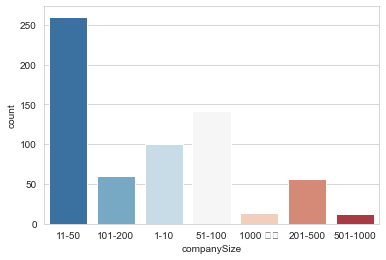

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='companySize',data=train_jobcompanies_pandas,palette='RdBu_r')

In [15]:
train_jobcompanies = train_jobcompanies_pandas[:]
train_jobcompanies['companySize'] = train_jobcompanies['companySize'].fillna('11-50')

In [16]:
companysizedict = {'1-10':1,'11-50':2,'51-100':3,'101-200':4,'201-500':5,'501-1000':6,'1000 이상':7}

In [17]:
jobsizedict = defaultdict(int)
for j,s in train_jobcompanies[['jobID','companySize']].values:
    jobsizedict[j] = companysizedict[s]

In [18]:
train_and_test['companySize'] = 1
for i,(j) in enumerate(train_and_test['jobID'].values):
    train_and_test.loc[i,'companySize'] = jobsizedict[j]
train_and_test.head()

,userID,jobID,3a835d3215755c435ef4fe9965a3f2a0,fb60d411a5c5b72b2e7d3527cfc84fd0,65fc9fb4897a89789352e211ca2d398f,4671aeaf49c792689533b00664a5c3ef,539fd53b59e3bb12d203f45a912eeaf2,39027dfad5138c9ca0c474d71db915c3,2cb6b10338a7fc4117a80da24b582060,bd4c9ab730f5513206b999ec0d90d1fb,...,c4015b7f368e6b4871809f49debe0579,63dc7ed1010d3c3b8269faf0ba7491d4,3bf55bbad370a8fcad1d09b005e278c2,cb79f8fa58b91d3af6c9c991f63962d3,17ed8abedc255908be746d245e50263a,285f89b802bcb2651801455c86d78f2a,93fb9d4b16aa750c7475b6d601c35c2c,5751ec3e9a4feab575962e78e006250d,96b9bff013acedfb1d140579e2fbeb63,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3


In [20]:
train_and_test.to_csv('prac3_train_and_test2.csv')

In [26]:
train_and_test = train_and_test.loc[:, (train_and_test != 0).any(axis=0)]
train_and_test

,userID,jobID,539fd53b59e3bb12d203f45a912eeaf2,bd4c9ab730f5513206b999ec0d90d1fb,45f31d16b1058d586fc3be7207b58053,fec87a37cdeec1c6ecf8181c0aa2d3bf,228499b55310264a8ea0e27b6e7c6ab6,bb7946e7d85c81a9e69fee1cea4a087c,afe434653a898da20044041262b3ac74,1d72310edc006dadf2190caad5802983,...,3210ddbeaa16948a702b6049b8d9a202,43cca4b3de2097b9558efefd0ecc3588,da11e8cd1811acb79ccf0fd62cd58f86,abea47ba24142ed16b7d8fbf2c740e0d,63dc7ed1010d3c3b8269faf0ba7491d4,3bf55bbad370a8fcad1d09b005e278c2,285f89b802bcb2651801455c86d78f2a,93fb9d4b16aa750c7475b6d601c35c2c,5751ec3e9a4feab575962e78e006250d,companySize
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,5
8431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
8433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [27]:
train_set, test_set = train_and_test.drop(['userID', 'jobID'], axis=1)[:6000], train_and_test.drop(['userID', 'jobID'], axis=1)[6000:]

In [28]:
train_set

,539fd53b59e3bb12d203f45a912eeaf2,bd4c9ab730f5513206b999ec0d90d1fb,45f31d16b1058d586fc3be7207b58053,fec87a37cdeec1c6ecf8181c0aa2d3bf,228499b55310264a8ea0e27b6e7c6ab6,bb7946e7d85c81a9e69fee1cea4a087c,afe434653a898da20044041262b3ac74,1d72310edc006dadf2190caad5802983,5dec707028b05bcbd3a1db5640f842c5,de7092ba6df4276921d27a3704c57998,...,3210ddbeaa16948a702b6049b8d9a202,43cca4b3de2097b9558efefd0ecc3588,da11e8cd1811acb79ccf0fd62cd58f86,abea47ba24142ed16b7d8fbf2c740e0d,63dc7ed1010d3c3b8269faf0ba7491d4,3bf55bbad370a8fcad1d09b005e278c2,285f89b802bcb2651801455c86d78f2a,93fb9d4b16aa750c7475b6d601c35c2c,5751ec3e9a4feab575962e78e006250d,companySize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
5997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3


In [29]:
test_set

,539fd53b59e3bb12d203f45a912eeaf2,bd4c9ab730f5513206b999ec0d90d1fb,45f31d16b1058d586fc3be7207b58053,fec87a37cdeec1c6ecf8181c0aa2d3bf,228499b55310264a8ea0e27b6e7c6ab6,bb7946e7d85c81a9e69fee1cea4a087c,afe434653a898da20044041262b3ac74,1d72310edc006dadf2190caad5802983,5dec707028b05bcbd3a1db5640f842c5,de7092ba6df4276921d27a3704c57998,...,3210ddbeaa16948a702b6049b8d9a202,43cca4b3de2097b9558efefd0ecc3588,da11e8cd1811acb79ccf0fd62cd58f86,abea47ba24142ed16b7d8fbf2c740e0d,63dc7ed1010d3c3b8269faf0ba7491d4,3bf55bbad370a8fcad1d09b005e278c2,285f89b802bcb2651801455c86d78f2a,93fb9d4b16aa750c7475b6d601c35c2c,5751ec3e9a4feab575962e78e006250d,companySize
6000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,3
6002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6003,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
6004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8430,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,5
8431,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8432,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,2
8433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [30]:
predict_label = tf.cast(tf.one_hot(train_pandas['applied'],2), tf.int64)

In [31]:
predict_label

<tf.Tensor: shape=(6000, 2), dtype=int64, numpy=
array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int64)>

In [32]:
seed = 7
np.random.seed(seed)

# Model
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(2500, input_dim=420))
model.add(tf.keras.layers.Dense(1250))
model.add(tf.keras.layers.Dense(625))
model.add(tf.keras.layers.Dense(312))
model.add(tf.keras.layers.Dense(56))
model.add(tf.keras.layers.Dense(28))
model.add(tf.keras.layers.Dense(10))
# model.add(tf.keras.layers.Dense(2, kernel_initializer='normal',activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(2))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_fit = model.fit(np.array(train_set), np.array(predict_label), epochs=5, batch_size=5, verbose=1,validation_split=0.1)

Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 6s 1ms/sample - loss: 13.8319 - accuracy: 0.1415 - val_loss: 13.5929 - val_accuracy: 0.1567
Epoch 2/5
5400/5400 [==============================] - 5s 876us/sample - loss: 13.8407 - accuracy: 0.1413 - val_loss: 13.5929 - val_accuracy: 0.1567
Epoch 3/5
5400/5400 [==============================] - 5s 882us/sample - loss: 13.8407 - accuracy: 0.1413 - val_loss: 13.5929 - val_accuracy: 0.1567
Epoch 4/5
5400/5400 [==============================] - 5s 886us/sample - loss: 13.8407 - accuracy: 0.1413 - val_loss: 13.5929 - val_accuracy: 0.1567
Epoch 5/5
5400/5400 [==============================] - 5s 880us/sample - loss: 13.8407 - accuracy: 0.1413 - val_loss: 13.5929 - val_accuracy: 0.1567


In [33]:
model.evaluate(np.array(train_set), np.array(predict_label))

6000/6000 [==============================] - 0s 82us/sample - loss: 13.8159 - accuracy: 0.1428


[13.815894101460774, 0.14283334]

In [34]:
y_predict = model(np.array(test_set))

In [35]:
print(y_predict)

tf.Tensor(
[[-37.80535  161.33302 ]
 [-32.85267  145.86542 ]
 [-35.787415 168.4903  ]
 ...
 [-18.015882  58.179035]
 [-17.572456  75.53702 ]
 [-27.43561  110.33606 ]], shape=(2435, 2), dtype=float32)


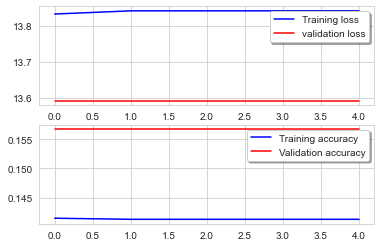

In [36]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history_fit.history['loss'], color='b', label="Training loss")
ax[0].plot(history_fit.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_fit.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_fit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [37]:
val_label_num = np.argmax(y_predict, axis=1).reshape(-1,1)

In [38]:
val_label_num

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [39]:
result = pd.DataFrame(val_label_num,columns=['applied'])
result

,applied
0,1
1,1
2,1
3,1
4,1
...,...
2430,1
2431,1
2432,1
2433,1


In [40]:
import datetime
now = datetime.datetime.now()
result.to_csv('output_{}.csv'.format(now.strftime('%y_%m_%d_%H_%M_%S')), index=False)